  ***Predicting County Turnouts for the US 2020 Election***

The goal of this report is to find an optimized model to find county turnouts in the 2020 US election. The data set, linked below, will have percentages of voter turn out as well as percentages about the population of the county. This includes ethinicity, education, and job percentages. Using this information, the optimized model should predict if a county votes Democratic or Republican. A sucessful model would be useful in predicting election results for future elections.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
from sklearn.model_selection import train_test_split
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

The link to the data set is https://www.kaggle.com/datasets/essarabi/ultimate-us-election-dataset

In [2]:
filename = "US_Election_dataset_v1.csv"
data = pd.read_csv(filename)

In [3]:
data

,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,"Sweetwater County, Wyoming",Sweetwater County,Wyoming,3823,23.03,12229,73.66,551,3.32,2.40%,...,0.61,0.67,0.14,0.35,4.38,30.80,15.47,19.47,20.34,13.92
3139,"Teton County, Wyoming",Teton County,Wyoming,9848,67.10,4341,29.58,488,3.32,2.40%,...,0.28,1.32,0.01,0.42,3.24,46.14,23.75,17.91,5.81,6.40
3140,"Uinta County, Wyoming",Uinta County,Wyoming,1591,16.92,7496,79.73,315,3.35,2.10%,...,0.60,0.53,0.13,0.37,3.11,31.19,17.86,20.48,17.38,13.09
3141,"Washakie County, Wyoming",Washakie County,Wyoming,651,16.23,3245,80.88,116,2.89,1.40%,...,0.59,0.43,0.01,0.56,2.77,34.84,16.97,18.43,14.84,14.92


In [4]:
print(data.columns.values)

['Unnamed: 0' 'county' 'state' '2020 Democrat vote raw'
 '2020 Democrat vote %' '2020 Republican vote raw'
 '2020 Republican vote %' '2020 other vote raw' '2020 other vote %'
 'Population with less than 9th grade education'
 'Population with 9th to 12th grade education, no diploma'
 'High School graduate and equivalent' 'Some College,No Degree'
 'Associates Degree' 'Bachelors Degree' 'Graduate or professional degree'
 'Gini Index' 'Median income (dollars)' 'Mean income (dollars)'
 'Area in square Km' 'Density per square km' 'Total Population'
 'Hispanic or Latino percentage' 'NH-White percentage'
 'NH-Black percentage' 'NH-American Indian and Alaska Native percentage'
 'NH-Asian percentage'
 'NH-Native Hawaiian and Other Pacific Islander percentage'
 'NH-Some Other Race percentage' 'NH-Two or More Races percentage'
 'Percentage engaged in Management, business, science, and arts occupations'
 'Percentage engaged in Service Occupations'
 'Percentage engaged in Sales and Office'
 'Percent

In [5]:
def preprocess(data):
    data = data.drop(["Unnamed: 0", "county", "state"], axis = 1)
    y = []
    #take out percentages strings
    for column in data.select_dtypes(include='object').columns:
        data[column] = data[column].replace('%', '', regex=True)
        data[column] = data[column].replace(',', '', regex=True)
        data[column] = data[column].replace('-', '', regex=True)
        data = data[data[column] != '']
        data[column] = data[column].astype(float)
    
    
    for i in data.index:
        ytemp = [data["2020 Democrat vote raw"][i], data["2020 Republican vote raw"][i], data["2020 other vote raw"][i]]
        #0 - democratic, 1 - republican, 2 - third party
        y.append(ytemp.index(max(ytemp)))
    print(data.columns.values)
    data.drop(columns=data.columns[:6], axis=1, inplace=True)
    print(data.columns.values)
   
    
  
    
    return y, data
    
    

In [6]:
y, data = preprocess(data)

['2020 Democrat vote raw' '2020 Democrat vote %'
 '2020 Republican vote raw' '2020 Republican vote %' '2020 other vote raw'
 '2020 other vote %' 'Population with less than 9th grade education'
 'Population with 9th to 12th grade education, no diploma'
 'High School graduate and equivalent' 'Some College,No Degree'
 'Associates Degree' 'Bachelors Degree' 'Graduate or professional degree'
 'Gini Index' 'Median income (dollars)' 'Mean income (dollars)'
 'Area in square Km' 'Density per square km' 'Total Population'
 'Hispanic or Latino percentage' 'NH-White percentage'
 'NH-Black percentage' 'NH-American Indian and Alaska Native percentage'
 'NH-Asian percentage'
 'NH-Native Hawaiian and Other Pacific Islander percentage'
 'NH-Some Other Race percentage' 'NH-Two or More Races percentage'
 'Percentage engaged in Management, business, science, and arts occupations'
 'Percentage engaged in Service Occupations'
 'Percentage engaged in Sales and Office'
 'Percentage engaged in Resources and Co

The goal of making a Knn model to fit the data was to be able to predict how different counties voted for certain different parties, specifically the Democratic and Republican parties, in 2020. First, the number of Democratic and Republican voters was used to calculate which specific party won in a county, and this was put into a list to serve as a target for the model. Any numbers that would show which party won would also be dropped from the data set. There was also some string values in the data set, so manipulation to take out string characters was done. The goal of the preprocessing was to make it so the data, both the target and features, have numerical data, so working with KNN models is easier. 

In [7]:
len(data)

3142

The next method of data manipulation was removing colinear features. This was done below because many features are similar, so including multiple colinear features in a data set would weigh those certain features more than others. For example, because median and mean income are very similar features, and were colinear, median income was dropped. Colinear features were found by using a heatmap, and were removed if their coorelation was shown to be close to 1. 

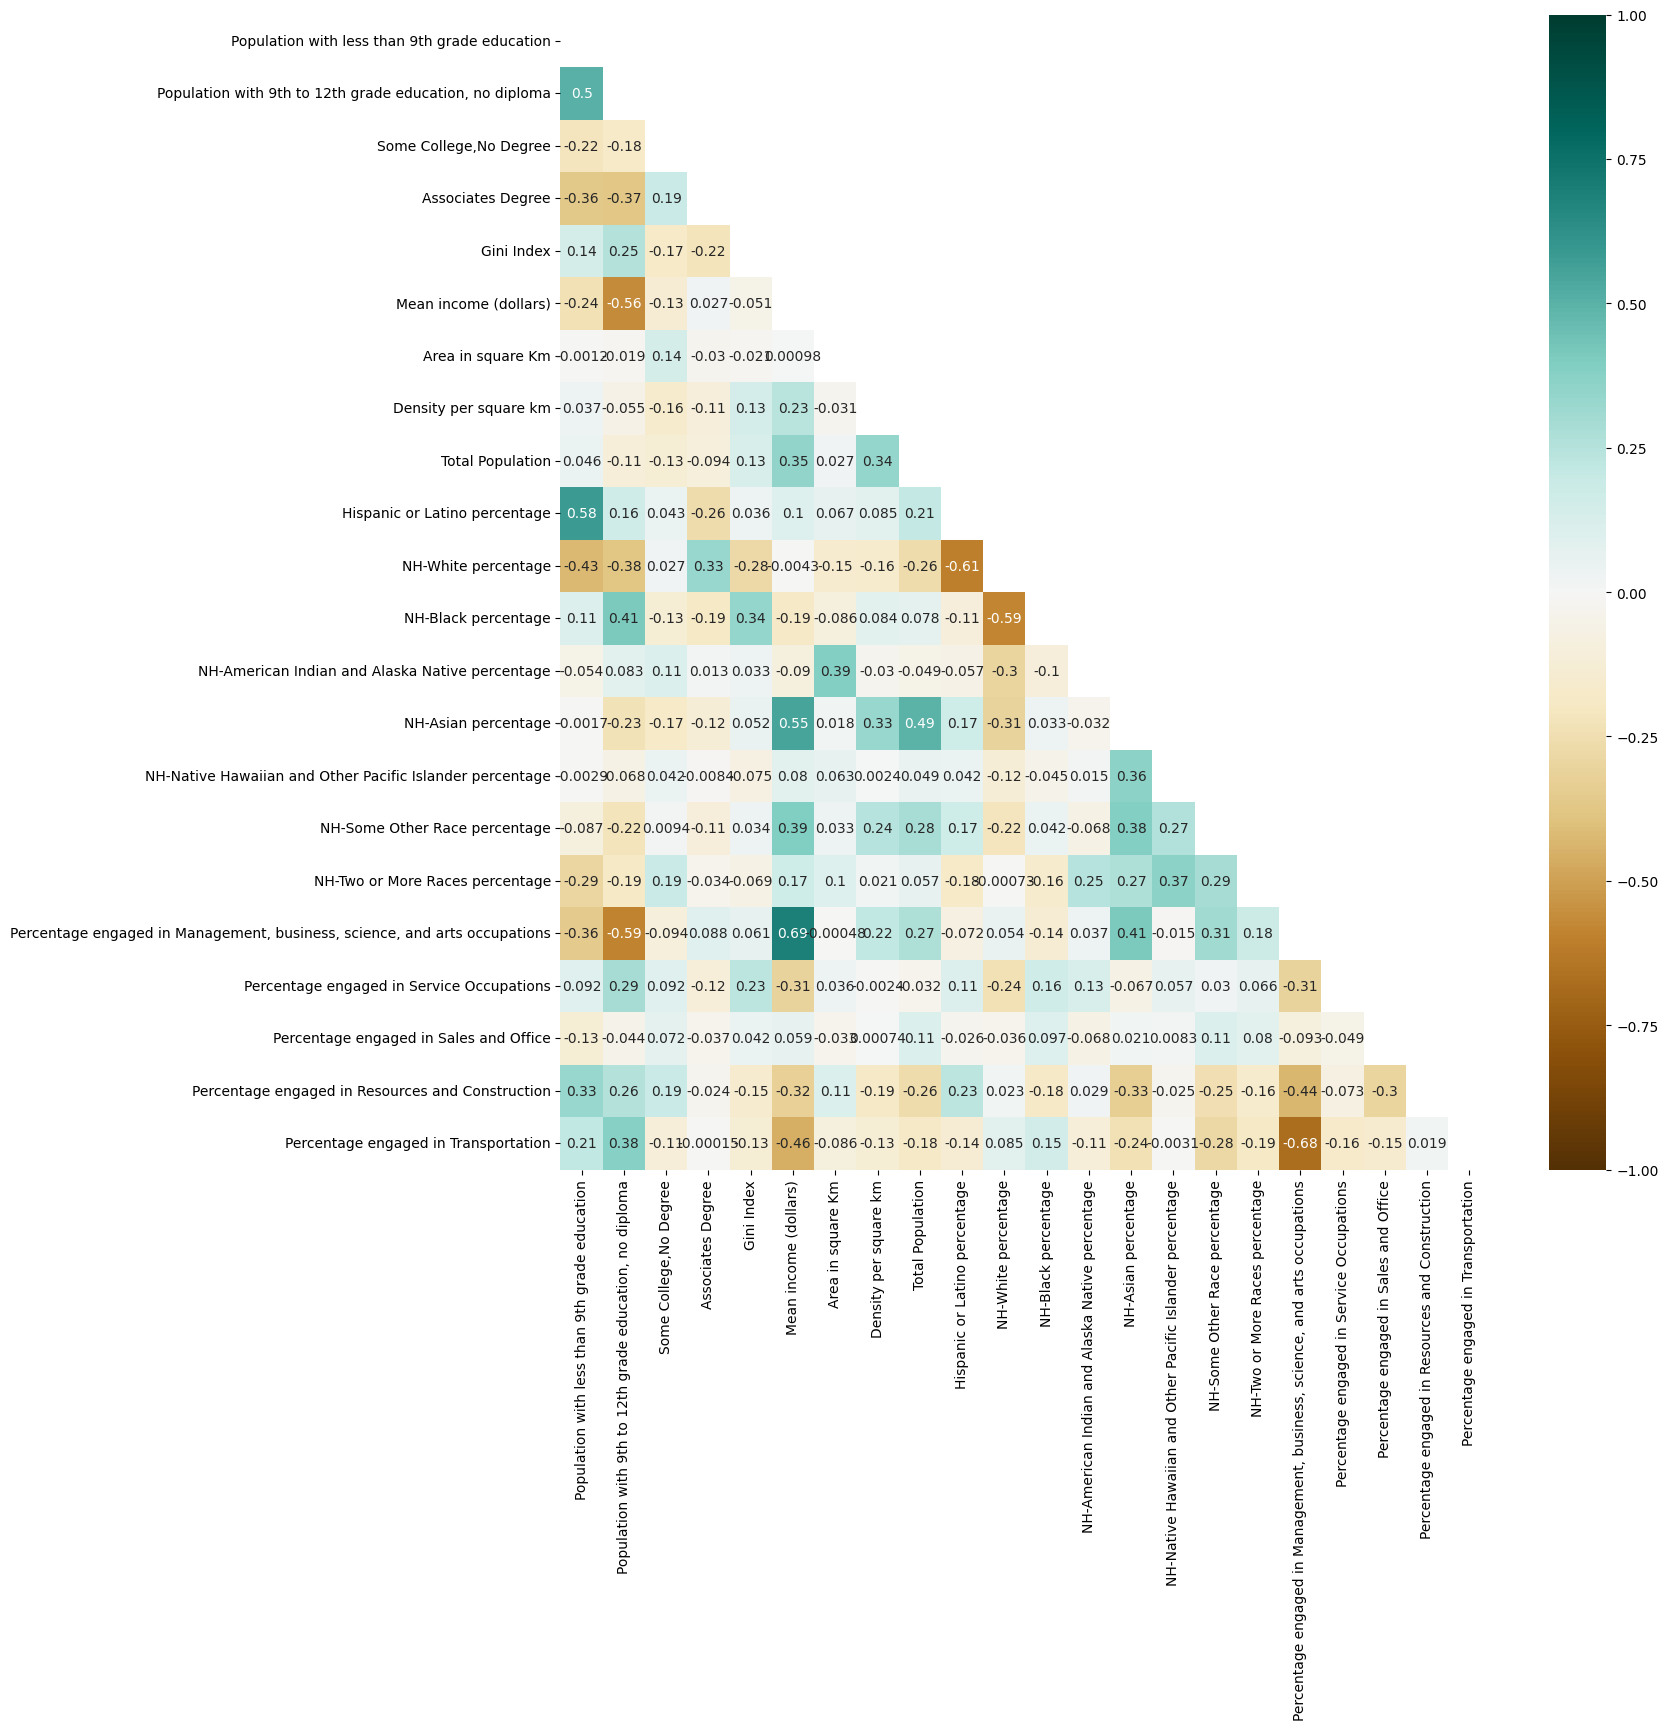

In [8]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

#dropping colinear
data = data.drop(columns = ['Median income (dollars)'])
data = data.drop(columns = ['High School graduate and equivalent'])
data = data.drop(columns = ['Bachelors Degree'])
data = data.drop(columns = ['Graduate or professional degree'])


for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
corr_matrix = data.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
fig = plt.gcf()  
fig.set_size_inches(15, 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.show();


The next method of data manipulation done was normalizing the data with a scaler. By using a histogram to visualize the data, it is seen that many features have largely different values, such as total population and mean income(dollars), which is shown in the histograms for the second cell below. By normalizing the data, a xscalar data set was created in which each feature had values of similar magnitudes, therefore making sure no features outweigh another for a model. This method seemed to have the most positive affect for increasing accuracy, improving the score from ~0.80 to ~0.90 for the KNN model used below, but there wasn't much change for the decision tree model.

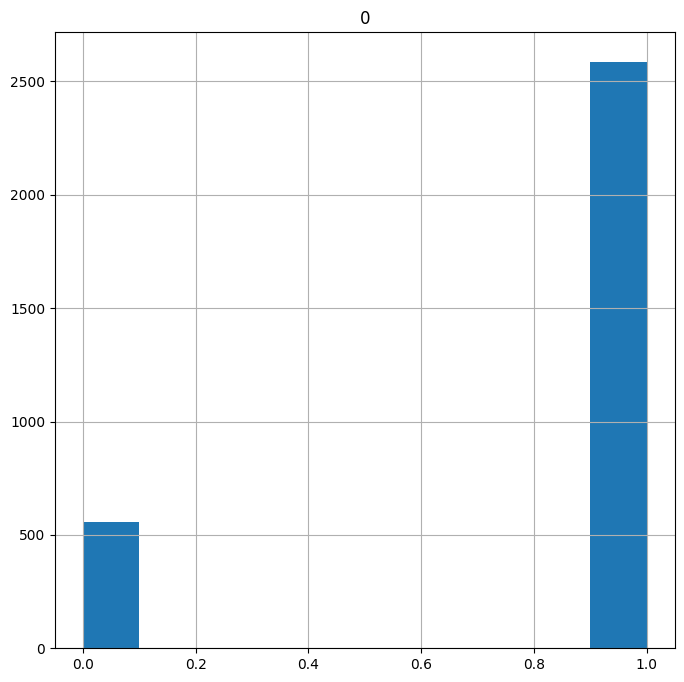

In [9]:
pd.DataFrame(y).hist(figsize=(8,8));

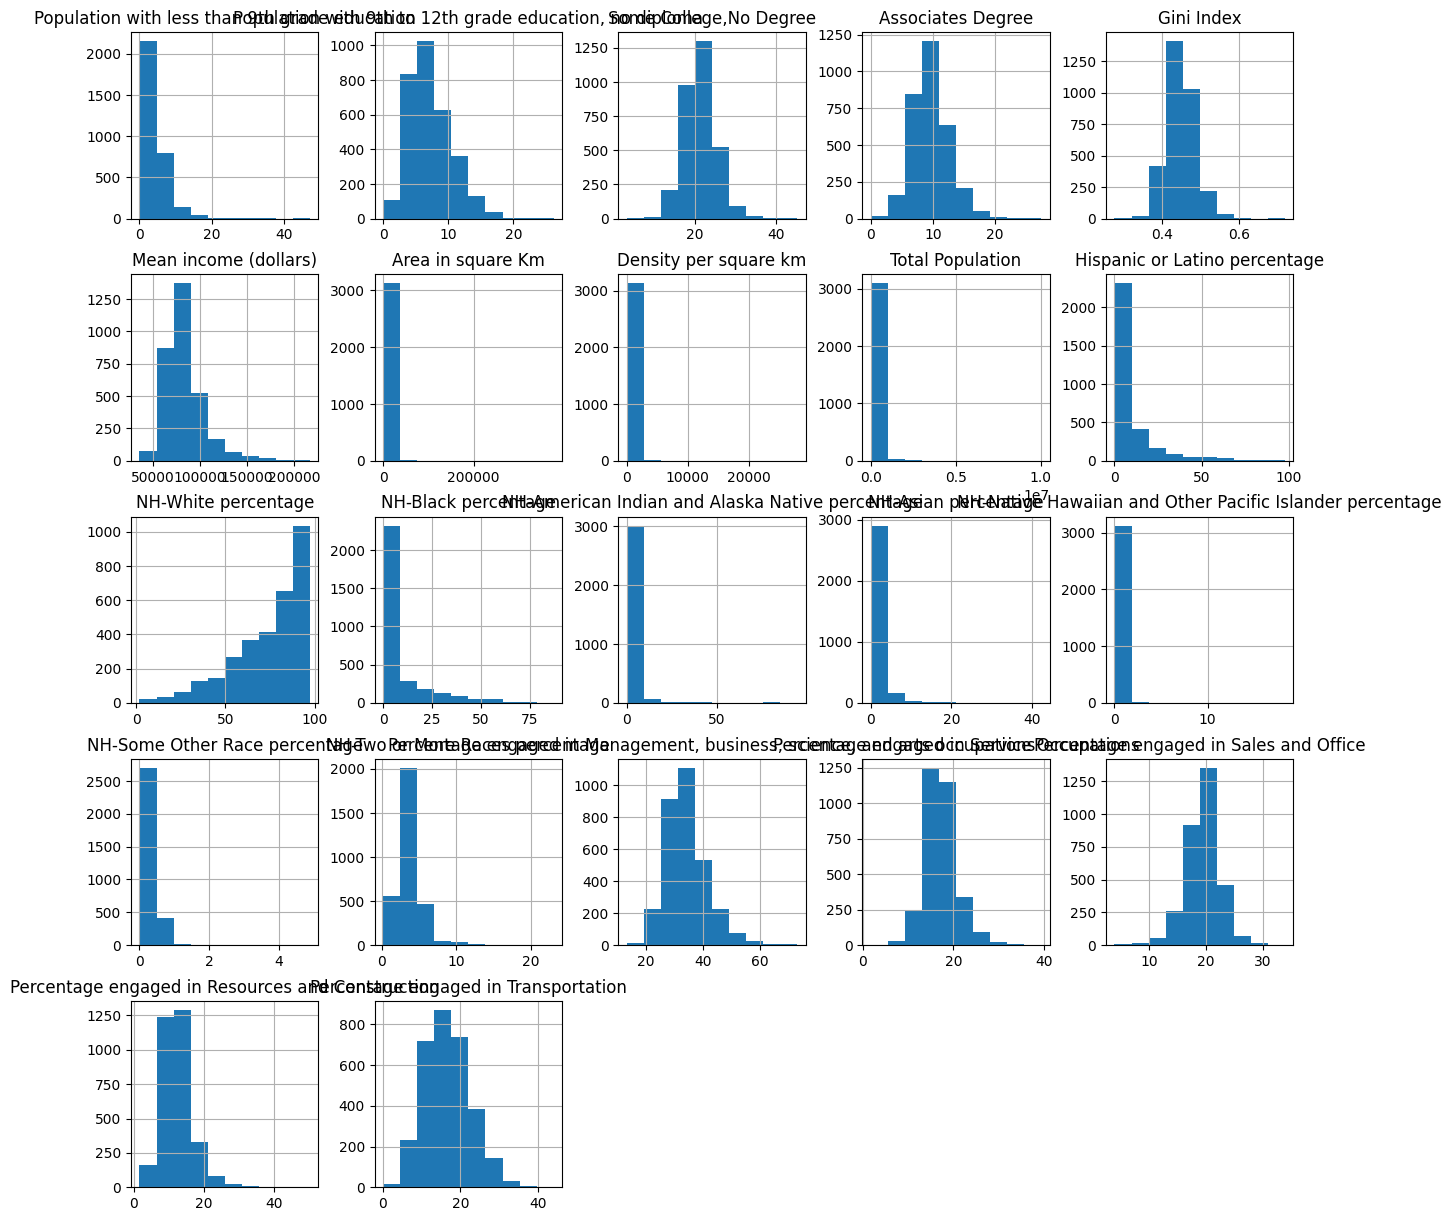

In [10]:
data.hist(figsize=(15,15));

In [11]:
scaler = MinMaxScaler()
xscaler = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

The first model used in this report is a KNN, which stands for K-nearest neighbors. This model is used due to the modeling having high accuracies when working with number based features. This notebook will experiment with different criteria of the model, such as metric distance and number of nearest neighbors, to find the most optimized KNN model.

In order to find the most optimized KNN model, different K values were tested with the data set, which is shown below. As K values increase to 10, the accuracy of the model also increases. However, when K values increase from 10, the accuracy seems to be unchanged. This means that by using a K value of 10, the model has an optimized accuracy, but also doesn't complete unecessary calculations. 

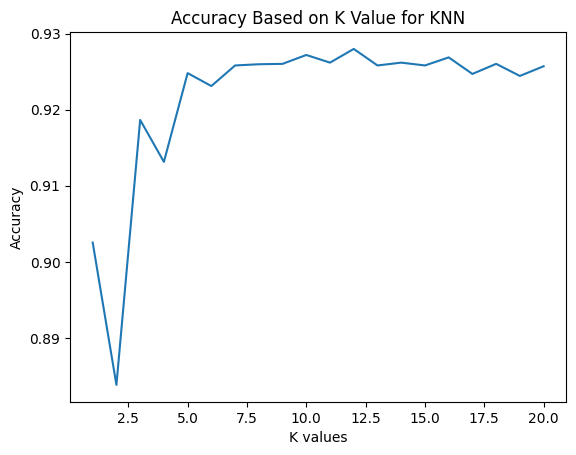

11


In [12]:
kValues = [i + 1 for i in range(20)]
accs = []

for j in range(30):
    #spliting into training and testing data sets
    X_train, X_test, y_train, y_test = train_test_split(xscaler, y, test_size=0.2)
    
    accsJ = []
    accuracy = 0
    for k in range(1,21):
        accuracy = 0
        knn = KNeighborsClassifier(n_neighbors = k, metric = "manhattan")
        knn.fit(X_train, y_train)
        ypred = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, ypred)
        accsJ.append(accuracy)
        ##print(numFalse)
    accs.append(accsJ)

accs = np.array([np.array(xi) for xi in accs])
#print(allFalse)
averageAccuracy = sum([i for i in accs])
#print(averageFalse)
averageAccuracy = np.divide(averageAccuracy, 30)
#print(kValues)
#print(averageFalse)
plt.plot(kValues, averageAccuracy);

plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Accuracy Based on K Value for KNN')
plt.show()
print(np.argmax(averageAccuracy))
        


Furtheremore, the default method of measuring distance for a KNN model is using an Euclidean calculation, which would work for this data set because it uses the magnitude of distances to compare points. The metric was changed to using Manhattan distance, which measures distances along a grid in which points are plotted on. The reason for this change was because Manhattan distance works better for models that have many features, due to its distance being less shifted by outliers, which is a problem for Euclidean distance. There was around a 1-2 increase in accuracy of the model when changing Euclidean to Manhattan distance. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(xscaler, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 10, metric = "manhattan")
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
print("Manhattan Accuracy: ")
accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy:.4f}")


knn = KNeighborsClassifier(n_neighbors = 10, metric = "euclidean")
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
print("Euclidean Accuracy: ")
accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy:.4f}")

Manhattan Accuracy: 
Accuracy: 0.9253
Euclidean Accuracy: 
Accuracy: 0.9157


To compare if KNN was the most optimal model, a decision tree was also used. The decision tree model uses a binary tree to predict the labels of points. It is predicted that this model wouldn't work as well as the KNN one due to KNN being known to work well for numerical data sets, which is seen in the accuracy section of this report.  

After doing research, the criterion was changed from "entropy" to "gini", which is better for the Sci-learn binary tree models. By changing the criterion to "gini", the sci-learn uses gini-impurity, which just shows how mixed the labels of the data is, to choose certain nodes to classify the data. Running the model multiplie times also shows that a max of depth of 5 is the most optimal for the decision tree. If the depth was high, like a value of 15, the accuracy is shown to decrease on the graph above. The reason a max depth of a lower number results in a better accuracy is because decision trees with less branches don't overfit the data, meaning that the model can generalize better.

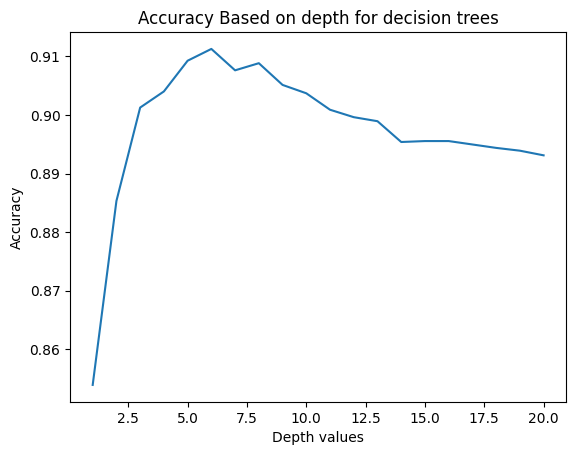

5


In [36]:
depthValues = [i + 1 for i in range(20)]
accs = []

for j in range(30):
    X_train, X_test, y_train, y_test = train_test_split(xscaler, y, test_size=0.2)
    
    accsJ = []
    accuracy = 0
    for k in range(1,21):
        model = DecisionTreeClassifier(max_depth = k, criterion='gini')
        model.fit(X_train, y_train)
        
        # Step 5: Make predictions and evaluate the model
        y_pred = model.predict(X_test)
        
        # Print accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accsJ.append(accuracy)
        ##print(numFalse)
    accs.append(accsJ)

accs = np.array([np.array(xi) for xi in accs])
#print(allFalse)
averageAccuracy = sum([i for i in accs])
#print(averageFalse)
averageAccuracy = np.divide(averageAccuracy, 30)
#print(kValues)
#print(averageFalse)
plt.plot(kValues, averageAccuracy);

plt.xlabel('Depth values')
plt.ylabel('Accuracy')
plt.title('Accuracy Based on depth for decision trees')
plt.show()
print(np.argmax(averageAccuracy))

By simply comparing the accuracy of the KNN model, which is ~94, with the accuracy of the decision tree classifier, which is ~91, it is clear that KNN is a better fit model for determining the winning party of a county. Still, using a confusion matrix, which is shown below, to compare the models is good due to the imbalance of the two parties in the data set. For both confusion matrixes, there was an even number of wrong positives and negatives, but the KNN model has around a fourth of the error the decision tree model has. Using this, a conclusion can be drawn stating that using KNN to determine which party certain counties voted for is a good model due to its high accuracy of ~0.94 and its low error count.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(xscaler, y, test_size=0.2)

Accuracy: 0.9221


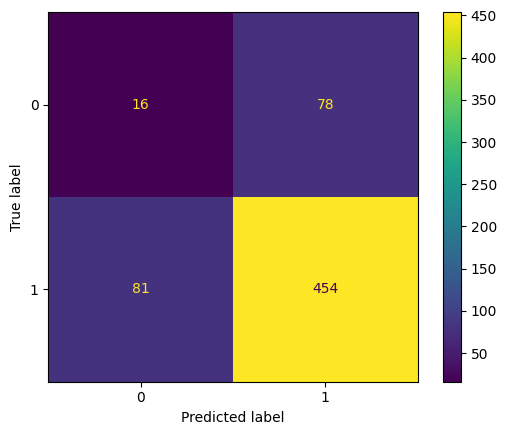

In [40]:
# Step 4: Train a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth = 5, criterion='gini')
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred)).plot();

Accuracy: 0.9348


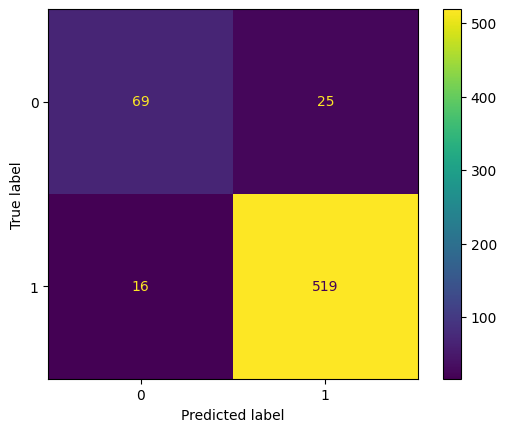

In [41]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = "manhattan")
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

accuracy = accuracy_score(y_test, ypred)
print(f"Accuracy: {accuracy:.4f}")
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred)).plot();

The conclusion of this report ends with a KNN model that has an excellent accuracy of 94, with a lower error than the decision tree model. Still, there is much more work that could be done using the dataset. A next step could be implementing a support vector machine in order to label data points, which could have a higher accuracy than the KNN model. Furthermore, using cross validation to test out many different train and test sets could make analysis more accurate. 

In [18]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [19]:
knn_results = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")

In [20]:
pd.Series(knn_results).describe()

count    5.000000
mean     0.931549
std      0.011956
min      0.918327
25%      0.926295
50%      0.928429
75%      0.934394
max      0.950298
dtype: float64

In [21]:
pipeline = make_pipeline(KNeighborsClassifier())

# Define parameter grid
param_grid = {
    'kneighborsclassifier__n_neighbors': [ 1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Print the grid_search to confirm no errors
print(grid_search)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30]},
             scoring='accuracy')


/home/aarav/ml/env/lib/python3.11/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30]},
             scoring='accuracy')

In [22]:
knn_cv_results = pd.DataFrame(grid_search.cv_results_)

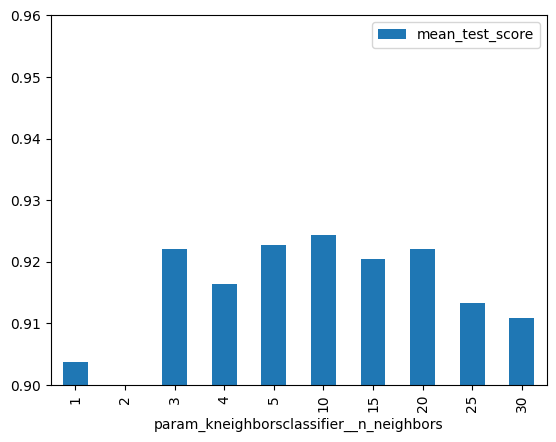

In [23]:
knn_cv_results.plot(x='param_kneighborsclassifier__n_neighbors', y='mean_test_score',
                   kind='bar',ylim=(0.9,0.96));

In [24]:
knn_cv_results.sort_values(by="mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.005527,0.002108,0.045928,0.001451,10,{'kneighborsclassifier__n_neighbors': 10},0.922434,0.945107,0.905615,0.924386,0.016182,1
4,0.003702,0.000591,0.040917,0.000063,5,{'kneighborsclassifier__n_neighbors': 5},0.924821,0.934368,0.909200,0.922796,0.010374,2
2,0.004759,0.001239,0.056040,0.007245,3,{'kneighborsclassifier__n_neighbors': 3},0.924821,0.933174,0.908005,0.922000,0.010467,3
7,0.002489,0.000268,0.051335,0.003746,20,{'kneighborsclassifier__n_neighbors': 20},0.922434,0.936754,0.906810,0.922000,0.012229,4
6,0.003737,0.001423,0.055229,0.003180,15,{'kneighborsclassifier__n_neighbors': 15},0.926014,0.937947,0.897252,0.920405,0.017081,5
3,0.003664,0.001106,0.052339,0.005166,4,{'kneighborsclassifier__n_neighbors': 4},0.920048,0.930788,0.898447,0.916427,0.013449,6
8,0.003958,0.000129,0.061351,0.011386,25,{'kneighborsclassifier__n_neighbors': 25},0.911695,0.924821,0.903226,0.913247,0.008884,7
9,0.003625,0.000291,0.066621,0.012493,30,{'kneighborsclassifier__n_neighbors': 30},0.906921,0.923628,0.902031,0.910860,0.009246,8
0,0.004506,0.001090,0.044502,0.005605,1,{'kneighborsclassifier__n_neighbors': 1},0.902148,0.916468,0.892473,0.903696,0.009857,9
1,0.005822,0.001743,0.061837,0.012454,2,{'kneighborsclassifier__n_neighbors': 2},0.887828,0.894988,0.878136,0.886984,0.006906,10


In [25]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'kneighborsclassifier__n_neighbors': 10}


In [26]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])


In [27]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with Best Model:", accuracy)

Test accuracy with Best Model: 0.9030206677265501
